# Importar librerias

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import missingno  as msno
import ast

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Leer csv de drive

In [ ]:
ruta_dir = "/content/drive/MyDrive/Colab Notebooks/octavo/benji/reto /data"

# Creacion de DF

## leer CSV y pasarlo a DF

In [ ]:
data = pd.read_csv(os.path.join(ruta_dir, 'Book_Details.csv'), encoding='utf-8')
data.sample(10)

Unnamed: 0   book_id  \
12020       12020  10357575   
5111         5111    169756   
14475       14475  32951022   
5932         5932    270805   
9203         9203   2253484   
10242       10242   4138041   
3897         3897     89578   
6693         6693    417640   
11296       11296   7124921   
3237         3237     61986   

                                         cover_image_uri  \
12020  https://images-na.ssl-images-amazon.com/images...   
5111   https://images-na.ssl-images-amazon.com/images...   
14475  https://images-na.ssl-images-amazon.com/images...   
5932   https://images-na.ssl-images-amazon.com/images...   
9203   https://images-na.ssl-images-amazon.com/images...   
10242  https://images-na.ssl-images-amazon.com/images...   
3897   https://images-na.ssl-images-amazon.com/images...   
6693   https://images-na.ssl-images-amazon.com/images...   
11296  https://images-na.ssl-images-amazon.com/images...   
3237   https://images-na.ssl-images-amazon.com/images...   

                                              book_title  \
12020                                               1Q84   
5111                                                Feed   
14475  Secret Slave: Kidnapped and abused for 13 year...   
5932                                             Impulse   
9203                                      Shadow Country   
10242                                          Firedrake   
3897   Adrift on the Haunted Seas: The Best Short Sto...   
6693   A Bright Shining Lie: John Paul Vann and Ameri...   
11296                                      The Last Hope   
3237                                     Jack of Shadows   

                                            book_details  \
12020  The year is 1984 and the city is Tokyo.A young...   
5111   Identity crises, consumerism, and star-crossed...   
14475  'You're not going home. You're not going anywh...   
5932   Sometimes you don't wake up. But if you happen...   
9203   Peter Matthiessen’s great American epic–Killin...   
10242  Drake returns home after fifteen years to face...   
3897   William Hope Hodgson (1877-1918) is acknowledg...   
6693   This passionate, epic account of the Vietnam W...   
11296  The end of the stars draws near. Three must be...   
3237   Shadowjack walks in silence and in shadows to ...   

                                     format  \
12020              ['944 pages, Hardcover']   
5111               ['308 pages, Paperback']   
14475         ['293 pages, Kindle Edition']   
5932               ['666 pages, Hardcover']   
9203               ['892 pages, Hardcover']   
10242              ['280 pages, Paperback']   
3897               ['288 pages, Paperback']   
6693               ['896 pages, Paperback']   
11296        ['384 pages, Library Binding']   
3237   ['236 pages, Mass Market Paperback']   

                             publication_info  \
12020        ['First published May 28, 2009']   
5111   ['First published September 23, 2002']   
14475   ['First published December 29, 2016']   
5932     ['First published January 23, 2007']   
9203      ['First published January 1, 2008']   
10242     ['First published January 1, 2008']   
3897     ['First published October 18, 2005']   
6693    ['First published September 1, 1988']   
11296       ['First published April 2, 2013']   
3237       ['First published August 1, 1972']   

                                              authorlink  \
12020  https://www.goodreads.com/author/show/3354.Har...   
5111   https://www.goodreads.com/author/show/31688.M_...   
14475  https://www.goodreads.com/author/show/16072242...   
5932   https://www.goodreads.com/author/show/2821144....   
9203   https://www.goodreads.com/author/show/6975.Pet...   
10242  https://www.goodreads.com/author/show/38820.Bi...   
3897   https://www.goodreads.com/author/show/51422.Wi...   
6693   https://www.goodreads.com/author/show/41544.Ne...   
11296  https://www.goodreads.com/author/show/27498.Er...   
3237   https://www.goodr

# Limpieza

## Eliminar columnas que no se utilizan
Se elimina:
  - 'Unnamed: 0',
  -'format',
  -'book_id',
  -'authorlink',
  -'publication_info'

Son columnas con valores en texto que no aportan a la problematica


In [ ]:
data.drop(['Unnamed: 0', 'format', 'book_id', 'authorlink', 'publication_info'], axis=1, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cover_image_uri      16225 non-null  object 
 1   book_title           16225 non-null  object 
 2   book_details         16177 non-null  object 
 3   author               16225 non-null  object 
 4   num_pages            16225 non-null  object 
 5   genres               16225 non-null  object 
 6   num_ratings          16225 non-null  int64  
 7   num_reviews          16225 non-null  int64  
 8   average_rating       16225 non-null  float64
 9   rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


## Verificar si hay datos faltantes

<Axes: >

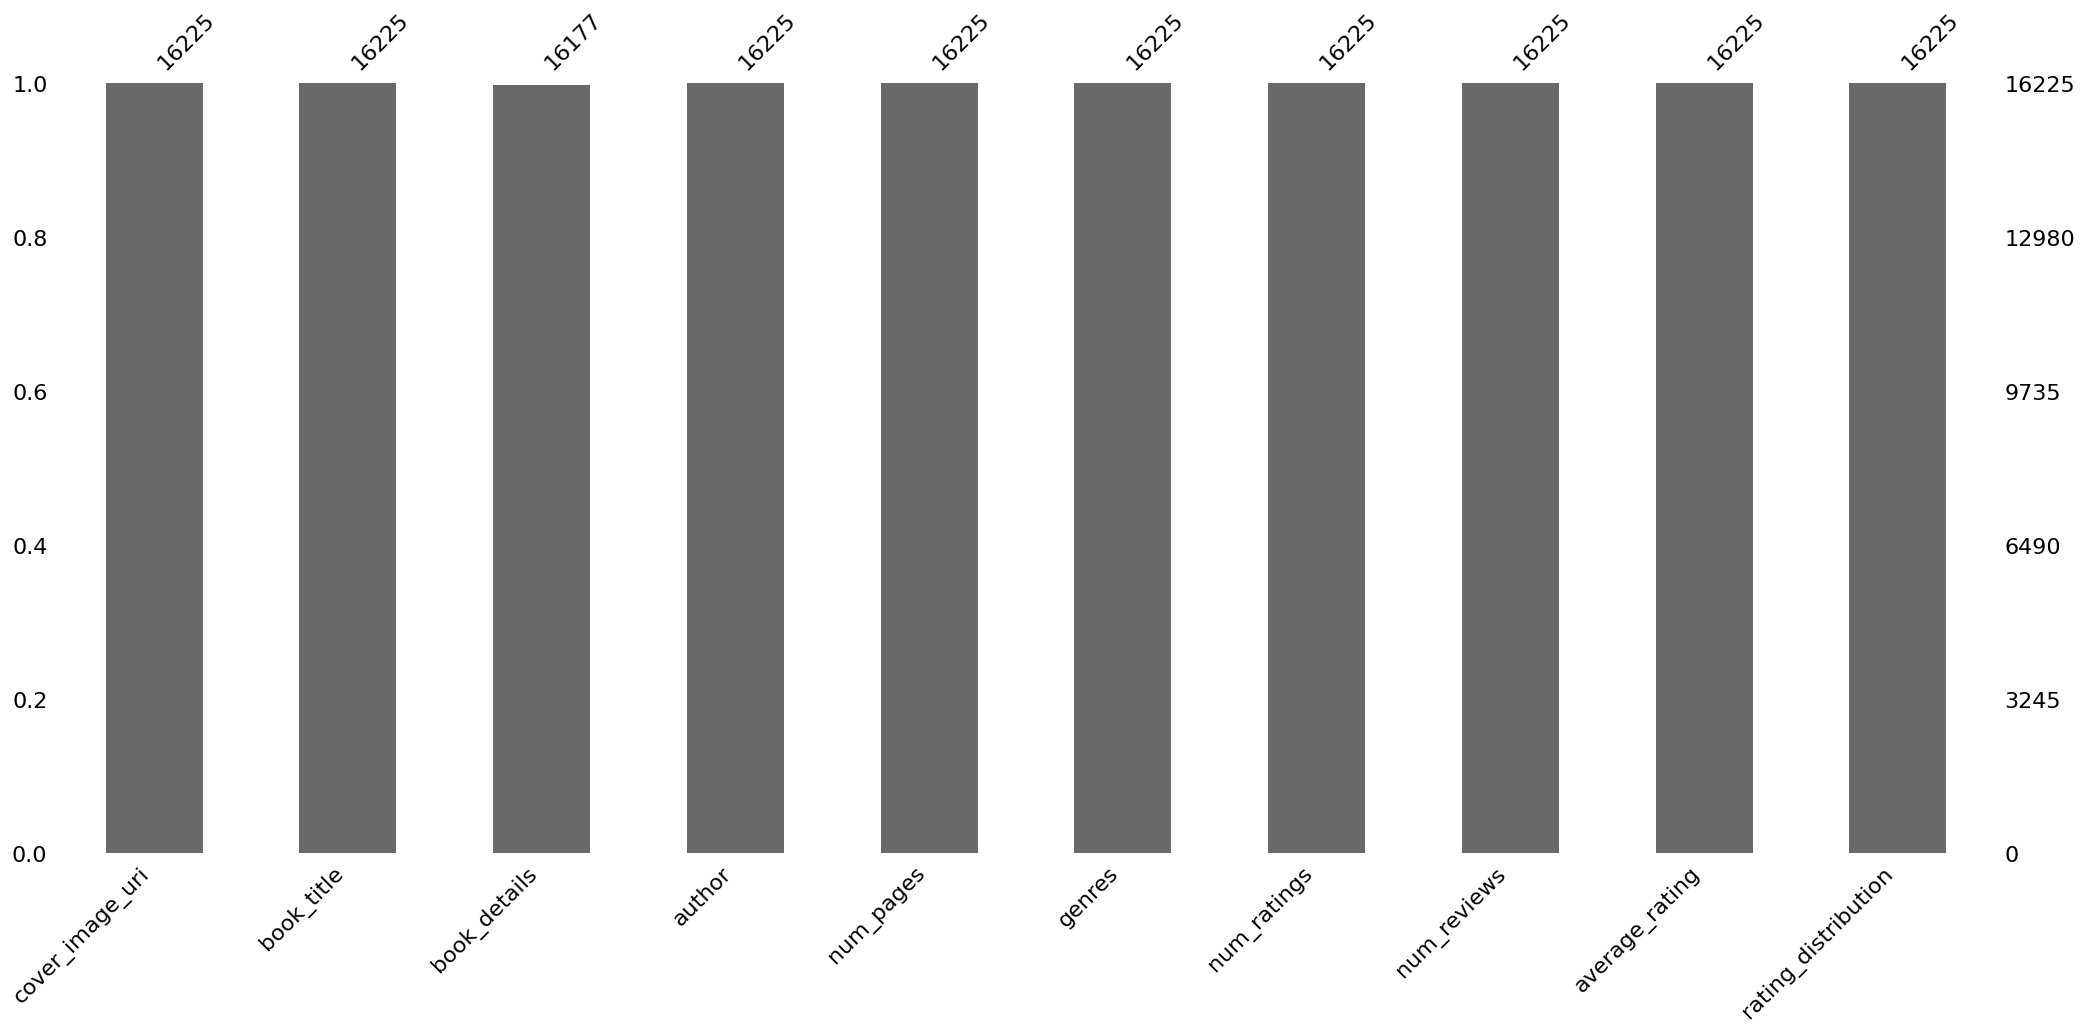

In [ ]:
msno.bar(data)

# Pre-procesado

## Separacion de Rating

### Funcion que saca el diccionario de la columna de rating, y crea una columna para cada rating

In [ ]:
def extract_ratings(rating_str):
  try:
    rating_dict = ast.literal_eval(rating_str)
    return {
        'rating_5': int(rating_dict.get('5', '0').replace(',', '')),
        'rating_4': int(rating_dict.get('4', '0').replace(',', '')),
        'rating_3': int(rating_dict.get('3', '0').replace(',', '')),
        'rating_2': int(rating_dict.get('2', '0').replace(',', '')),
        'rating_1': int(rating_dict.get('1', '0').replace(',', ''))
    }
  except:
    return {'rating_5': 0, 'rating_4': 0, 'rating_3': 0, 'rating_2': 0, 'rating_1': 0}


### se manda llamar la funcion y se llenan las columnas

In [ ]:
data[['rating_5', 'rating_4', 'rating_3', 'rating_2', 'rating_1']] = data['rating_distribution'].apply(extract_ratings).apply(pd.Series)

data.drop('rating_distribution', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cover_image_uri  16225 non-null  object 
 1   book_title       16225 non-null  object 
 2   book_details     16177 non-null  object 
 3   author           16225 non-null  object 
 4   num_pages        16225 non-null  object 
 5   genres           16225 non-null  object 
 6   num_ratings      16225 non-null  int64  
 7   num_reviews      16225 non-null  int64  
 8   average_rating   16225 non-null  float64
 9   rating_5         16225 non-null  int64  
 10  rating_4         16225 non-null  int64  
 11  rating_3         16225 non-null  int64  
 12  rating_2         16225 non-null  int64  
 13  rating_1         16225 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 1.7+ MB


## Numero de paginas

### funcion que elimina los corechetes de lista y retorna el numero de pagina en entero de la columna "num_page"


In [ ]:
def limpiar_num_pages(valor):
    valor_str = str(valor).strip("[]'").strip()
    if valor_str.lower() == 'None' or valor_str == '':
        return 0
    try:
        return int(valor_str)
    except:
      return 0

### se manda llamar la funcion y se aplica a la misma columna

In [ ]:
data['num_pages'] = data['num_pages'].apply(limpiar_num_pages)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cover_image_uri  16225 non-null  object 
 1   book_title       16225 non-null  object 
 2   book_details     16177 non-null  object 
 3   author           16225 non-null  object 
 4   num_pages        16225 non-null  int64  
 5   genres           16225 non-null  object 
 6   num_ratings      16225 non-null  int64  
 7   num_reviews      16225 non-null  int64  
 8   average_rating   16225 non-null  float64
 9   rating_5         16225 non-null  int64  
 10  rating_4         16225 non-null  int64  
 11  rating_3         16225 non-null  int64  
 12  rating_2         16225 non-null  int64  
 13  rating_1         16225 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.7+ MB


## Revisar como va quedando el DF

In [ ]:
data.sample(10)

cover_image_uri  \
8477   https://images-na.ssl-images-amazon.com/images...   
9110   https://images-na.ssl-images-amazon.com/images...   
10294  https://images-na.ssl-images-amazon.com/images...   
8238   https://images-na.ssl-images-amazon.com/images...   
13034  https://images-na.ssl-images-amazon.com/images...   
11725  https://images-na.ssl-images-amazon.com/images...   
12307  https://images-na.ssl-images-amazon.com/images...   
8281   https://images-na.ssl-images-amazon.com/images...   
4674   https://images-na.ssl-images-amazon.com/images...   
8716   https://images-na.ssl-images-amazon.com/images...   

                                              book_title  \
8477   The Laws of Spirit: Simple, Powerful Truths fo...   
9110                                            Child 44   
10294            Dragan Radelscu & The Vampires Of Paris   
8238                                                Dart   
13034                                               Rule   
11725                                    The Sacred Band   
12307                                              Slade   
8281                              Het goddelijke monster   
4674                      Universal Principles of Design   
8716                        The Miracle at Speedy Motors   

                                            book_details  \
8477   Explains twelve of the spiritual laws upon whi...   
9110   MGB officer Leo is a man who never questions t...   
10294  This is the sequel to Lifeblood, The Last Vamp...   
8238   Over the past three years Alice Oswald has bee...   
13034  Opposites in every way . . . except the one th...   
11725  An adventure like no other. Two Sacred Bands, ...   
12307  Book 2 in the New Species series. The books ca...   
8281                                               Dutch   
4674   Whether a marketing campaign or a museum exhib...   
8716   Under the endless skies of Botswana, there is ...   

                       author  num_pages  \
8477              Dan Millman        120   
9110            Tom Rob Smith        509   
10294         Shamus Sherwood        404   
8238             Alice Oswald         64   
13034           Jay Crownover        369   
11725         Janet E. Morris        570   
12307          Laurann Dohner        247   
8281               Tom Lanoye        336   
4674          William Lidwell        216   
8716   Alexander McCall Smith        214   

                                                  genres  num_ratings  \
8477   ['Spirituality', 'Self Help', 'Philosophy', 'P...         1544   
9110   ['Fiction', 'Historical Fiction', 'Thriller', ...        85581   
10294                                                 []            1   
8238   ['Poetry', 'Nature', 'Fiction', 'Contemporary'...         1279   
13034  ['Romance', 'New Adult', 'Contemporary', 'Cont...       100585   
11725  ['Fantasy', 'Historical Fiction', 'Historical ...          314   
12307  ['Paranormal', 'Romance', 'Paranormal Romance'...        23104   
8281   ['Fiction', 'Roman', 'Literature', 'Dutch Lite...         1901   
4674   ['Design', 'Nonfiction', 'Business', 'Art', 'R...         5769   
8716   ['Mystery', 'Fiction', 'Africa', 'Botswana', '...        24462   

       num_reviews  average_rating  rating_5  rating_4  rating_3  rating_2  \
8477           108            4.26       768       497       217        43   
9110          7020            4.10     31948     35874     13616      2862   
10294            0            5.00         1         0         0         0   
8238           129            3.95       445       457       272        84   
13034         6258            4.11     42143     35714     16501      4215   
11725           57            4.47       225        42        25        13   
12307         1168            4.17     10227      7872      3978       825   
8281            39            3.69       331       867       524       135   
4674           181            4.16      2597      1921       903   

## Género (Encoding)

### Funcion: que saca una lista de generos que no se pueden repetir por el uso del set, le quita los espacios antes y despues para que quede limpio

In [ ]:
def clean_data(data):
  genre_set = set()
  for genres_str in data:
      try:
        genres_list = ast.literal_eval(genres_str)
        # Crear una lista nueva
        clean_genres = []
        for g in genres_list:
          # Eliminar espacios antes y después del texto
          clean_genres.append(g.strip())

          # Agregar todos los géneros limpios al conjunto
          genre_set.update(clean_genres)
      except:
        genre_set.add('Unknown')
  return list(genre_set)

### se manda llamar la funcion para limpiar los generos y se organizan alfabeticamente con Sort()

In [ ]:
genre = clean_data(data['genres'])
genre.sort()
len(genre)

728

### hacer el hot encoder para mis generos

poner 1 y 0 para saber si tiene o no el género

In [ ]:
def hot_encoder(data, genre):
  for g in genre:
    data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
  return data

In [ ]:
data = hot_encoder(data, genre)
data.drop('genres', axis=1, inplace=True)
data.info()

<ipython-input-13-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
<ipython-input-13-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
<ipython-input-13-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Columns: 741 entries, cover_image_uri to Zombies
dtypes: float64(1), int64(736), object(4)
memory usage: 91.7+ MB


<ipython-input-13-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
<ipython-input-13-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
<ipython-input-13-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

## Checar como va quedando

In [ ]:
data.sample(5).T

702    \
cover_image_uri                 https://images-na.ssl-images-amazon.com/images...   
book_title                                                          Holy the Firm   
book_details                    "[This] is a book of great richness, beauty an...   
author                                                              Annie Dillard   
num_pages                                                                      76   
...                                                                           ...   
Young Adult Historical Fiction                                                  0   
Young Adult Paranormal                                                          0   
Young Adult Romance                                                             0   
Zimbabwe                                                                        0   
Zombies                                                                         0   

                                                                            9651   \
cover_image_uri                 https://images-na.ssl-images-amazon.com/images...   
book_title                                                             Ghost Walk   
book_details                    Haunted-attraction designer Ken Ripple has des...   
author                                                                Brian Keene   
num_pages                                                                     275   
...                                                                           ...   
Young Adult Historical Fiction                                                  0   
Young Adult Paranormal                                                          0   
Young Adult Romance                                                             0   
Zimbabwe                                                                        0   
Zombies                                                                         0   

                                                                            14749  \
cover_image_uri                 https://images-na.ssl-images-amazon.com/images...   
book_title                      Not Nice: Stop People Pleasing, Staying Silent...   
book_details                    Are You Too Nice? If you find it hard to be as...   
author                                                              Aziz Gazipura   
num_pages                                                                     507   
...                                                                           ...   
Young Adult Historical Fiction                                                  0   
Young Adult Paranormal                                                          0   
Young Adult Romance                                                             0   
Zimbabwe                                                                        0   
Zombies                                                                         0   

                                                                            12748  \
cover_image_uri                 https://images-na.ssl-images-amazon.com/images...   
book_title                                                    The Sword of Summer   
book_details                    Magnus Chase has seen his share of trouble. Ev...   
author                                                               Rick Riordan   
num_pages                                                                     512   
...                                                                           ...   
Young Adult Historical Fiction                                                  0   
Young Adult Paranormal                                                          0   
Young Adult Romance                                                             0   
Zimbabwe                                                                        0   
Zombies                                                                       

## Autor

### Contar cuántos libros ha escrito cada autor para ver si vale la pena hacer un encoding de los autores


In [ ]:
libros_por_autor = data['author'].value_counts().reset_index()
libros_por_autor.columns = ['author', 'book_count']
libros_por_autor['percentage(%)'] = (libros_por_autor['book_count'] / libros_por_autor['book_count'].sum()) * 100
libros_por_autor.sort_values(by='book_count', ascending=False, inplace=True)

libros_por_autor.head(10)

author  book_count  percentage(%)
0     Stephen King          79       0.486903
2   Danielle Steel          48       0.295840
1  Agatha Christie          48       0.295840
3    Sylvia Browne          43       0.265023
4  Terry Pratchett          42       0.258860
6     Rick Riordan          39       0.240370
5  James Patterson          39       0.240370
7    Sarah J. Maas          38       0.234206
8      Neil Gaiman          36       0.221880
9    Julie Mannino          34       0.209553

### se lismpian los autores:

In [ ]:
def clean_authors(data):
    author_set = set()
    for author in data:
        if pd.isna(author):
            author_set.add('Unknown')
        else:
            author_set.add(author.strip())
    return list(author_set)




In [ ]:
authors = clean_authors(data['author'])
authors.sort()
len(authors)

7615

### hacer el hot encoder para mis autores

poner 1 y 0 para saber si tiene o no el autor

In [ ]:
def author_hot_encoder(data, authors):
    for author in authors:
        data[author] = data['author'].apply(lambda x: 1 if pd.notna(x) and x.strip() == author else 0)
    return data

In [ ]:
data = author_hot_encoder(data, authors)
data.drop('author', axis=1, inplace=True)


Se han truncado las últimas 5000 líneas del flujo de salida.
<ipython-input-19-e10a9475a3df>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[author] = data['author'].apply(lambda x: 1 if pd.notna(x) and x.strip() == author else 0)
<ipython-input-19-e10a9475a3df>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[author] = data['author'].apply(lambda x: 1 if pd.notna(x) and x.strip() == author else 0)
<ipython-input-19-e10a9475a3df>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Columns: 8355 entries, cover_image_uri to နုနုရည်အင်းဝ
dtypes: float64(1), int64(8351), object(3)
memory usage: 1.0+ GB


## Checar como va quedando

In [ ]:
data.sample(5).T

3176   \
cover_image_uri     https://images-na.ssl-images-amazon.com/images...   
book_title                                          Love in the Ruins   
book_details        Dr. Tom More has created a stethoscope of the ...   
num_pages                                                         416   
num_ratings                                                      4045   
...                                                               ...   
هبة سيد عبد العاطي                                                  0   
يحيى بن شرف النووي                                                  0   
يوسف زيدان                                                          0   
ปรีดี พนมยงค์                                                       0   
နုနုရည်အင်းဝ                                                        0   

                                                                13974  \
cover_image_uri     https://images-na.ssl-images-amazon.com/images...   
book_title                            The Amazing Book Is Not on Fire   
book_details        Hello reader,In this book is a world. A world ...   
num_pages                                                         224   
num_ratings                                                     17744   
...                                                               ...   
هبة سيد عبد العاطي                                                  0   
يحيى بن شرف النووي                                                  0   
يوسف زيدان                                                          0   
ปรีดี พนมยงค์                                                       0   
နုနုရည်အင်းဝ                                                        0   

                                                                5691   \
cover_image_uri     https://images-na.ssl-images-amazon.com/images...   
book_title          I Won't Learn from You: And Other Thoughts on ...   
book_details        "I won't learn from you" is Herb Kohl's now-cl...   
num_pages                                                         176   
num_ratings                                                       508   
...                                                               ...   
هبة سيد عبد العاطي                                                  0   
يحيى بن شرف النووي                                                  0   
يوسف زيدان                                                          0   
ปรีดี พนมยงค์                                                       0   
နုနုရည်အင်းဝ                                                        0   

                                                                686    \
cover_image_uri     https://images-na.ssl-images-amazon.com/images...   
book_title                                                Animal Farm   
book_details        Nei de dea fån Ald Majoar, de baarch dy’t harr...   
num_pages                                                         122   
num_ratings                                                   3910908   
...                                                               ...   
هبة سيد عبد العاطي                                                  0   
يحيى بن شرف النووي                                                  0   
يوسف زيدان                                                          0   
ปรีดี พนมยงค์                                                       0   
နုနုရည်အင်းဝ                                                        0   

                                                                4233   
cover_image_uri     https://images-na.ssl-images-amazon.com/images...  
book_title                            Preacher, Volume 5: Dixie Fried  
book_details        Collectible. First Edition. Fifth Printing.Col...  
num_pages                                                         224  
num_ratings                                                     19811  
...                                                               ...  
هبة سيد عبد العاطي                                  

## Pasar el DF limpio a un CSV

In [ ]:
data.to_csv('data_clean.csv', index=False, encoding='utf-8-sig')

# Separar el Data Frame:

## Divide en 80% training y 20% testing

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_data.sample(5).T

12875  \
cover_image_uri     https://images-na.ssl-images-amazon.com/images...   
book_title                                               الفيل الأزرق   
book_details        بعد خمس سنوات من العُزلة الاختيارية يستأنف د. ...   
num_pages                                                         386   
num_ratings                                                     64064   
...                                                               ...   
هبة سيد عبد العاطي                                                  0   
يحيى بن شرف النووي                                                  0   
يوسف زيدان                                                          0   
ปรีดี พนมยงค์                                                       0   
နုနုရည်အင်းဝ                                                        0   

                                                                12389  \
cover_image_uri     https://images-na.ssl-images-amazon.com/images...   
book_title                                                Monument 14   
book_details        Your mother hollers that you're going to miss ...   
num_pages                                                         304   
num_ratings                                                     24090   
...                                                               ...   
هبة سيد عبد العاطي                                                  0   
يحيى بن شرف النووي                                                  0   
يوسف زيدان                                                          0   
ปรีดี พนมยงค์                                                       0   
နုနုရည်အင်းဝ                                                        0   

                                                                631    \
cover_image_uri     https://images-na.ssl-images-amazon.com/images...   
book_title                                    The Broom of the System   
book_details        Published when Wallace was just twenty-four ye...   
num_pages                                                         467   
num_ratings                                                     22778   
...                                                               ...   
هبة سيد عبد العاطي                                                  0   
يحيى بن شرف النووي                                                  0   
يوسف زيدان                                                          0   
ปรีดี พนมยงค์                                                       0   
နုနုရည်အင်းဝ                                                        0   

                                                                7260   \
cover_image_uri     https://images-na.ssl-images-amazon.com/images...   
book_title                                             Ragged Company   
book_details        Four chronically homeless people–Amelia One Sk...   
num_pages                                                         376   
num_ratings                                                      5590   
...                                                               ...   
هبة سيد عبد العاطي                                                  0   
يحيى بن شرف النووي                                                  0   
يوسف زيدان                                                          0   
ปรีดี พนมยงค์                                                       0   
နုနုရည်အင်းဝ                                                        0   

                                                                5813   
cover_image_uri     https://images-na.ssl-images-amazon.com/images...  
book_title                                 Who's Looking Out for You?  
book_details        From the mega-bestselling author of The O'Reil...  
num_pages                                                         213  
num_ratings                                                      1493  
...                                                               ...  
هبة سيد عبد العاطي                                  

#Añadir indice

In [ ]:
def set_index_id(df):
    df = df.reset_index(drop=True)
    df.index.name = 'id'
    return df

## preparar df para escalarlo eliminando columnas no numericas:

In [ ]:
columns_drop = ['cover_image_uri', 'book_title', 'book_details']

# Separar columnas no numéricas y mantener el índice
train_text = train_data[columns_drop].copy()
test_text = test_data[columns_drop].copy()

train = train_data.drop(columns_drop, axis=1)
test = test_data.drop(columns_drop, axis=1)

# Preparar DF para escalamiento

In [ ]:
train = set_index_id(train)
test = set_index_id(test)

train_text = set_index_id(train_text)
test_text = set_index_id(test_text)

In [ ]:
train_text.head(5)

cover_image_uri  \
id                                                      
0   https://images-na.ssl-images-amazon.com/images...   
1   https://images-na.ssl-images-amazon.com/images...   
2   https://images-na.ssl-images-amazon.com/images...   
3   https://images-na.ssl-images-amazon.com/images...   
4   https://images-na.ssl-images-amazon.com/images...   

                          book_title  \
id                                     
0                     The Upanishads   
1                     Savage Grounds   
2   Castaways of the Flying Dutchman   
3                   Unwelcome Bodies   
4                   Roadside Crosses   

                                         book_details  
id                                                     
0   The Upanishads, the earliest of which were com...  
1   A missing woman.A fugitive on the run.A case w...  
2   A boy and dog trapped aboard the Flying Dutchm...  
3   Pain. Pleasure. The sensation of touch.we feel...  
4   Roadside crosses are appearing along the highw...

# Escalamiento

## hacer Standar Scalation en los datos  de test y train

In [ ]:
# Inicializar y ajustar el StandardScaler
scaler = StandardScaler()

#escalamiento
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Convertir los arrays escalados de nuevo a DataFrames para mejor manejo
train_scaled_df = pd.DataFrame(train_scaled, columns=train.columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test.columns, index=test.index)

In [ ]:
train_scaled_df.sample(5).T

id                     838       10254     1429      102       1262 
num_pages           0.447016 -0.577574 -0.526147 -0.340217 -1.281733
num_ratings        -0.164845 -0.263942  1.164186 -0.203756 -0.269004
num_reviews        -0.144527 -0.319844  0.722825 -0.282037 -0.325471
average_rating      1.046762  1.471376  0.773795  0.561488  0.076214
rating_5           -0.122683 -0.223577  1.275056 -0.176935 -0.230010
...                      ...       ...       ...       ...       ...
هبة سيد عبد العاطي -0.008778 -0.008778 -0.008778 -0.008778 -0.008778
يحيى بن شرف النووي -0.008778 -0.008778 -0.008778 -0.008778 -0.008778
يوسف زيدان          0.000000  0.000000  0.000000  0.000000  0.000000
ปรีดี พนมยงค์       0.000000  0.000000  0.000000  0.000000  0.000000
နုနုရည်အင်းဝ       -0.008778 -0.008778 -0.008778 -0.008778 -0.008778

[8352 rows x 5 columns]

## juntar los df esclados con las columnas no numericas

In [ ]:
# new_scaled_train = train_scaled_df.join(train_data[columns_drop])
# new_scaled_test = test_scaled_df.join(test_data[columns_drop])

In [ ]:
# new_scaled_test.sample(5).T

5587   \
num_pages                                                 -0.56175   
num_ratings                                              -0.251276   
num_reviews                                              -0.302331   
average_rating                                           -1.167299   
rating_5                                                 -0.224015   
...                                                            ...   
Zombies                                                  -0.060924   
cover_image_uri  https://images-na.ssl-images-amazon.com/images...   
book_title                                           The Simulacra   
book_details     Set in the middle of the twenty-first century,...   
author                                              Philip K. Dick   

                                                             15435  \
num_pages                                                 0.174056   
num_ratings                                              -0.201287   
num_reviews                                              -0.026807   
average_rating                                           -0.773015   
rating_5                                                 -0.199026   
...                                                            ...   
Zombies                                                  -0.060924   
cover_image_uri  https://images-na.ssl-images-amazon.com/images...   
book_title                                           Instant Karma   
book_details     Chronic overachiever Prudence Barnett is alway...   
author                                               Marissa Meyer   

                                                             4861   \
num_pages                                                 0.597342   
num_ratings                                              -0.209842   
num_reviews                                              -0.288865   
average_rating                                            0.318851   
rating_5                                                  -0.18422   
...                                                            ...   
Zombies                                                  -0.060924   
cover_image_uri  https://images-na.ssl-images-amazon.com/images...   
book_title                                                  Area 7   
book_details     Matthew Reilly dazzled the world with his elec...   
author                                              Matthew Reilly   

                                                             2298   \
num_pages                                                 0.308558   
num_ratings                                               0.143907   
num_reviews                                                0.30663   
average_rating                                           -0.318071   
rating_5                                                  0.048335   
...                                                            ...   
Zombies                                                  -0.060924   
cover_image_uri  https://images-na.ssl-images-amazon.com/images...   
book_title       One Thousand White Women: The Journals of May ...   
book_details     One Thousand White Women is the story of May D...   
author                                                  Jim Fergus   

                                                             4046   
num_pages                                                 1.329193  
num_ratings                                              -0.161832  
num_reviews                                              -0.219383  
average_rating                                             0.37951  
rating_5                                                 -0.146789  
...                                                            ...  
Zombies                                                  -0.060924  
cover_image_uri  https://images-na.ssl-images-amazon.com/images...  
book_title                                              Night Fall  
book_de

# Converitr los DF a CSV

In [ ]:
train_scaled_df.to_csv('train_scaled.csv', index=True, index_label='id', encoding='utf-8')
test_scaled_df.to_csv('test_scaled.csv', index=True, index_label='id', encoding='utf-8')

train_text.to_csv('train_text.csv', index=True, index_label='id', encoding='utf-8')
test_text.to_csv('test_text.csv', index=True, index_label='id', encoding='utf-8')

train_data.to_csv('train_data.csv', index=True, encoding='utf-8')
test_data.to_csv('test_data.csv', index=True, encoding='utf-8')


# new_scaled_train.to_csv('train_data.csv', index=False)
# new_scaled_test.to_csv('test_data.csv', index=False)